In [1032]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

In [1033]:
df = pd.read_csv("Data/spamfilter_04-07-2022.csv", encoding= 'latin-1', parse_dates=['hs_comp_date','birthdate','ca_outside_tax_year',
                                                                          'ca_outside_voted_year','ca_outside_college_year','tstmp_submit',
                                                                          'ca_outside_lawsuit_year','col1_start_date','col1_end_date'])
df

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
0,20533939,AFL7434,D,431,0,0,AA.BSM,O,72019.0,True,...,0.010438,True,"200,12",False,NaN,NaN,NaN,False,NaN,NaN
1,20001036,BYK7240,D,61,0,188003,ASL-INTP.C,A,0.0,True,...,0.071064,NaN,"200,06",False,NaN,CE,NaN,False,NaN,NaN
2,21001875,BZX3228,I,781,0,134153,3,C,31955.0,True,...,0.545216,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
3,20072831,BYP4261,D,531,0,0,05000.AA,A,32016.0,True,...,0.006094,True,"800,809",False,NaN,NaN,NaN,False,NaN,NaN
4,22784952,AHA5797,D,431,0,0,AA.HDS,C,41993.0,True,...,0.013285,NaN,"100,111,300,368,418",False,NaN,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163364,22757151,CDY1977,D,171,0,0,AA-T.4001,B,10000.0,True,...,0.000668,NaN,"100,111,800,809",False,NaN,11,NaN,False,NaN,NaN
163365,20943136,CAK3229,I,711,0,0,AS-BMGT,A,42001.0,True,...,0.176334,True,"800,809",False,NaN,NaN,NaN,False,NaN,NaN
163366,20136563,BLM4902,I,881,0,0,MSCT,A,32019.0,True,...,0.000986,NaN,"100,109",False,NaN,NaN,NaN,False,NaN,NaN
163367,20030416,BYM0850,D,531,0,0,15400.AAT,C,20000.0,True,...,0.053719,NaN,"800,801",False,NaN,NaN,NaN,False,NaN,NaN


In [1034]:
df.shape

(163369, 300)

In [1035]:
df.isnull().sum()

app_id                             0
ccc_id                             0
status                             0
college_id                         0
term_id                            0
                               ...  
highest_grade_completed       142444
integrity_fg_41               160574
confirmed_fraud                    0
cccid_app_count               163369
previously_confirmed_fraud    163369
Length: 300, dtype: int64

In [1036]:
df.isnull().any()

app_id                        False
ccc_id                        False
status                        False
college_id                    False
term_id                       False
                              ...  
highest_grade_completed        True
integrity_fg_41                True
confirmed_fraud               False
cccid_app_count                True
previously_confirmed_fraud     True
Length: 300, dtype: bool

In [1037]:
df.columns

Index(['app_id', 'ccc_id', 'status', 'college_id', 'term_id', 'major_id',
       'intended_major', 'edu_goal', 'highest_edu_level', 'consent_indicator',
       ...
       'fraud_score', 'ssid_rematched', 'race_ethnic_full', 'non_credit',
       'integrity_fg_81', 'highest_grade_completed', 'integrity_fg_41',
       'confirmed_fraud', 'cccid_app_count', 'previously_confirmed_fraud'],
      dtype='object', length=300)

In [1038]:
df.groupby('confirmed_fraud').size()

confirmed_fraud
False    140000
True      23369
dtype: int64

In [1039]:
df_legit= df[df['confirmed_fraud']== False].sample(10)
df_legit

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
51753,22751696,AUX2534,I,771,0,51336,NR1N,A,72004.0,True,...,0.008857,NaN,"800,809",False,NaN,NaN,NaN,False,NaN,NaN
145532,22334921,CDJ0033,D,743,0,0,M040790F,N,62019.0,True,...,0.005791,NaN,"800,801",True,True,NaN,NaN,False,NaN,NaN
22700,22267864,BJT6888,D,941,0,29292,AA.ART,A,32020.0,True,...,0.001051,NaN,"100,111,800,809",False,NaN,NaN,NaN,False,NaN,NaN
95211,20949040,CAK5582,D,22,0,182572,GAOJ1,G,32020.0,True,...,0.107994,True,NaN,False,NaN,NaN,NaN,False,NaN,NaN
31658,22267469,AVW6616,D,961,0,0,CE869,M,32018.0,True,...,0.006254,NaN,"100,111",False,NaN,NaN,NaN,False,NaN,NaN
138866,22783627,BEJ5649,D,493,0,0,W.BIO.AST,K,82018.0,True,...,0.016990,NaN,800,False,NaN,NaN,NaN,False,NaN,NaN
86937,19869063,BDE4334,D,71,0,0,1UNDECLARE,M,10000.0,True,...,0.001416,NaN,"500,15",False,NaN,11,NaN,False,NaN,NaN
11939,20329456,ANF5600,D,231,0,0,091004,B,32019.0,True,...,0.015107,True,"100,119",False,NaN,NaN,NaN,False,NaN,NaN
148207,22247285,AUH1513,D,747,0,0,V035427H,A,72017.0,True,...,0.000213,NaN,"500,15",False,NaN,NaN,NaN,False,NaN,NaN
92870,22255130,CCJ5038,D,576,0,106797,C.888A.AS,C,32022.0,True,...,0.001185,True,"100,111,600,18,800,804",False,NaN,NaN,NaN,False,NaN,NaN


In [1040]:
df_Fraud= df[df['confirmed_fraud']== True].sample(10)
df_Fraud

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
29287,20114595,BYS1570,D,51,0,183842,MARKETINGA,A,31984.0,True,...,0.033785,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
56463,22182519,CDB6046,I,482,0,0,0549,A,32003.0,True,...,0.389637,True,NaN,False,NaN,NaN,NaN,True,NaN,NaN
129375,20749159,BZZ0753,I,61,0,0,BUS-ADMN.X,A,31987.0,True,...,0.363461,True,NaN,False,NaN,NaN,NaN,True,NaN,NaN
2296,22708002,CDW3828,I,891,0,0,S-BS-AS-MARKET,B,32018.0,True,...,0.885684,NaN,"300,319",False,NaN,NaN,NaN,True,NaN,NaN
80621,20999467,BYV8645,I,31,0,0,APPMETR-AS,A,31986.0,True,...,0.490823,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
11021,21741557,CBJ9269,I,892,0,0,I-ZZ-AS-NATSCI,M,32019.0,True,...,0.347498,True,"800,808",False,NaN,NaN,NaN,True,NaN,NaN
13369,21753318,CBY4409,D,811,0,2372,12G,J,10000.0,True,...,0.000536,NaN,"100,111",False,NaN,11,NaN,True,NaN,NaN
158830,22207737,ATX4910,I,271,0,0,MANAGEMENT-S,O,32020.0,True,...,0.000159,True,"800,808",False,NaN,NaN,NaN,True,NaN,NaN
129510,22695778,BZX1947,I,241,0,0,ADMJ.AS,H,31977.0,True,...,0.526000,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN
158540,22203758,BSY9901,I,551,0,0,ACCNTNG-CT,C,32007.0,True,...,0.481163,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN


In [1041]:
df.groupby('fraud_status').size()

fraud_status
4    140000
5     21331
6      2038
dtype: int64

In [1042]:
df.groupby('fraud_status').mean()['fraud_score'].round(decimals=2)

fraud_status
4    0.02
5    0.59
6    0.50
Name: fraud_score, dtype: float64

In [1043]:
df.groupby('confirmed_fraud').mean()['fraud_status'].round(decimals=2)

confirmed_fraud
False    4.00
True     5.09
Name: fraud_status, dtype: float64

In [1044]:
df.groupby('fraud_status').mean()['grade_point_average'].round(decimals=2)

fraud_status
4    3.16
5    3.23
6    3.10
Name: grade_point_average, dtype: float64

In [1045]:
#df = df.confirmed_fraud.map({False:0, True:1})
#df

In [1046]:
df.groupby('major_description').mean()['fraud_score'].round(decimals=2)

major_description
 Autobody Repair/Refinish AS                                  0.19
 Autobody Repair/Refinish Cert.                               0.13
 Autobody Repair/Refinishing -- Associate in Science*         0.35
 Autobody Repair/Refinishing -- Certificate of Achievement    0.00
 GDS Graphic Design, CERT - CA (Financial Aid Eligible)       0.02
                                                              ... 
e_discovery and Litigation Support                            0.04
iOS Application Security Support Specialist, CERT             0.01
iOS Programming                                               0.05
iPhone App Programming                                        0.00
iPhone App Programming -- Certificate of Achievement          0.01
Name: fraud_score, Length: 13606, dtype: float64

In [1047]:
df.groupby('perm_country').mean()['fraud_score'].round(decimals=2)

perm_country
AD    0.98
AE    0.33
AF    0.27
AG    0.98
AI    0.84
      ... 
VI    0.32
VN    0.60
WK    0.79
ZA    0.49
ZW    0.36
Name: fraud_score, Length: 142, dtype: float64

In [1048]:
df.groupby('zip4').mean()['fraud_score'].round(decimals=2)

zip4
1.0       0.17
2.0       0.01
5.0       0.01
18.0      0.00
20.0      0.00
          ... 
9826.0    0.00
9832.0    0.00
9997.0    0.11
9998.0    0.01
9999.0    0.04
Name: fraud_score, Length: 5331, dtype: float64

In [1049]:
df.groupby("ip_address").mean()["fraud_status"]

ip_address
1.10.208.197     5.0
1.152.110.138    4.0
1.160.77.155     5.0
1.161.133.214    5.0
1.161.68.66      5.0
                ... 
99.99.67.197     4.0
99.99.67.221     4.0
99.99.69.101     4.0
99.99.70.165     4.0
99.99.70.248     4.0
Name: fraud_status, Length: 111033, dtype: float64

In [1050]:
df_mask = (df.fraud_status == 5) & (df.fraud_score > 0.3)
df_filtered= df[df_mask]
df_filtered

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
2,21001875,BZX3228,I,781,0,134153,3,C,31955.0,True,...,0.545216,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
5,20806650,CAC2720,I,451,0,0,AS.DWMD,M,32018.0,True,...,0.731864,True,"800,803",False,NaN,NaN,NaN,True,NaN,NaN
20,21764233,CCC6039,I,312,0,0,CA.ADMCA.D,J,32021.0,True,...,0.945591,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN
21,21228114,CBA3797,I,291,0,163982,CHEM.AS,A,32020.0,True,...,0.660271,True,800,False,NaN,NaN,NaN,True,NaN,NaN
38,20983096,CAM1908,I,91,0,0,01650.IGETC.UC.AA,M,32017.0,True,...,0.838192,True,"800,808",False,NaN,NaN,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163318,22217283,CDD2056,I,482,0,0,2238,K,32018.0,True,...,0.807702,NaN,"100,105",False,NaN,NaN,NaN,True,NaN,NaN
163334,20989925,CAM1887,I,231,0,0,091013,M,32020.0,True,...,0.523534,True,"800,806",False,NaN,NaN,NaN,True,NaN,NaN
163337,20317165,BZC1462,I,747,0,0,V002952C,M,32018.0,True,...,0.525015,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
163351,22616476,CDT4758,I,241,0,0,ADDSTU.AS,G,31976.0,True,...,0.458406,NaN,800,False,NaN,NaN,NaN,True,NaN,NaN


In [1051]:
df_mask1 = (df.fraud_status == 6) & (df.fraud_score > 0.3)
df_filtered1= df[df_mask1]
df_filtered1

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
52,22227428,CDD6607,D,482,0,0,0572,A,31993.0,True,...,0.392080,True,"800,806",False,NaN,NaN,NaN,True,NaN,NaN
145,20065680,BXB0360,D,661,0,0,5620,A,32014.0,True,...,0.999995,NaN,"800,806",False,NaN,NaN,NaN,True,NaN,NaN
187,22712996,CDW4845,I,312,0,0,AST.BIOSC.D,A,32020.0,True,...,0.315954,NaN,"200,06,800,806",False,NaN,NaN,NaN,True,NaN,NaN
290,20768462,BQC9145,D,482,0,0,0411,A,31978.0,True,...,0.300390,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
442,20294846,BZA9706,D,873,0,163246,SCC.ANTH.AA,A,31964.0,True,...,0.551499,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162646,21769597,CBF0268,I,471,0,0,2BIS.AS.1,A,41979.0,True,...,0.316664,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
162880,20828585,CAD5735,D,471,0,0,2BUS.AST.1,A,31999.0,True,...,0.303067,True,"800,806",False,NaN,NaN,NaN,True,NaN,NaN
162984,20681540,AJN6810,D,661,0,0,4049,C,32006.0,True,...,0.997767,True,"100,116",False,NaN,NaN,NaN,True,NaN,NaN
163097,20277231,AGV3095,D,721,0,84173,2530,A,32006.0,True,...,0.979652,True,"500,15",False,NaN,NaN,NaN,True,NaN,NaN


In [1052]:
df_mask2 = (df.ssn_no == True) & (df.fraud_status == 5) & (df.fraud_score > 0.3)
df_filtered2= df[df_mask2]
df_filtered2

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
20,21764233,CCC6039,I,312,0,0,CA.ADMCA.D,J,32021.0,True,...,0.945591,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN
39,22095934,CCX5366,I,312,0,0,AA.ARTGD.D,A,62018.0,True,...,0.984009,NaN,"700,702",False,NaN,NaN,True,True,NaN,NaN
64,21742882,CCB2579,I,312,0,0,AS.ADJUS.D,A,0.0,True,...,0.980517,NaN,NaN,False,NaN,NaN,True,True,NaN,NaN
103,21750501,CCB7941,I,312,0,0,AS.ADSAC.D,K,0.0,False,...,0.975807,NaN,"200,06",False,NaN,NaN,NaN,True,NaN,NaN
261,21753023,CCB9460,I,361,0,116443,SAOJ,J,0.0,True,...,0.999688,NaN,800,False,NaN,NaN,True,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162878,20825644,CAD4173,I,851,0,0,N0459,B,42019.0,True,...,0.505457,NaN,"800,808",False,NaN,NaN,NaN,True,NaN,NaN
162913,20829300,CAD6223,I,361,0,116443,SAOJ,J,0.0,True,...,0.999947,NaN,"200,06,08,10,12,13,209",False,NaN,NaN,True,True,NaN,NaN
163051,21633403,CBV8056,I,851,0,0,N0459,B,42020.0,True,...,0.995318,NaN,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
163153,21824801,CCG5542,I,361,0,116446,SAJT,J,32020.0,True,...,0.999955,True,"800,807",False,NaN,NaN,True,True,NaN,NaN


In [1053]:
df_mask3 = (df.confirmed_fraud == True) &(df.fraud_status == 6) & (df.fraud_score > 0.3)
df_filtered3= df[df_mask3]
df_filtered3

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
52,22227428,CDD6607,D,482,0,0,0572,A,31993.0,True,...,0.392080,True,"800,806",False,NaN,NaN,NaN,True,NaN,NaN
145,20065680,BXB0360,D,661,0,0,5620,A,32014.0,True,...,0.999995,NaN,"800,806",False,NaN,NaN,NaN,True,NaN,NaN
187,22712996,CDW4845,I,312,0,0,AST.BIOSC.D,A,32020.0,True,...,0.315954,NaN,"200,06,800,806",False,NaN,NaN,NaN,True,NaN,NaN
290,20768462,BQC9145,D,482,0,0,0411,A,31978.0,True,...,0.300390,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
442,20294846,BZA9706,D,873,0,163246,SCC.ANTH.AA,A,31964.0,True,...,0.551499,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162646,21769597,CBF0268,I,471,0,0,2BIS.AS.1,A,41979.0,True,...,0.316664,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
162880,20828585,CAD5735,D,471,0,0,2BUS.AST.1,A,31999.0,True,...,0.303067,True,"800,806",False,NaN,NaN,NaN,True,NaN,NaN
162984,20681540,AJN6810,D,661,0,0,4049,C,32006.0,True,...,0.997767,True,"100,116",False,NaN,NaN,NaN,True,NaN,NaN
163097,20277231,AGV3095,D,721,0,84173,2530,A,32006.0,True,...,0.979652,True,"500,15",False,NaN,NaN,NaN,True,NaN,NaN


In [1054]:
df_mask4 = (df.confirmed_fraud == True) &(df.fraud_status == 5) & (df.fraud_score > 0.3)
df_filtered4= df[df_mask4]
df_filtered4

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
2,21001875,BZX3228,I,781,0,134153,3,C,31955.0,True,...,0.545216,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
5,20806650,CAC2720,I,451,0,0,AS.DWMD,M,32018.0,True,...,0.731864,True,"800,803",False,NaN,NaN,NaN,True,NaN,NaN
20,21764233,CCC6039,I,312,0,0,CA.ADMCA.D,J,32021.0,True,...,0.945591,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN
21,21228114,CBA3797,I,291,0,163982,CHEM.AS,A,32020.0,True,...,0.660271,True,800,False,NaN,NaN,NaN,True,NaN,NaN
38,20983096,CAM1908,I,91,0,0,01650.IGETC.UC.AA,M,32017.0,True,...,0.838192,True,"800,808",False,NaN,NaN,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163318,22217283,CDD2056,I,482,0,0,2238,K,32018.0,True,...,0.807702,NaN,"100,105",False,NaN,NaN,NaN,True,NaN,NaN
163334,20989925,CAM1887,I,231,0,0,091013,M,32020.0,True,...,0.523534,True,"800,806",False,NaN,NaN,NaN,True,NaN,NaN
163337,20317165,BZC1462,I,747,0,0,V002952C,M,32018.0,True,...,0.525015,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
163351,22616476,CDT4758,I,241,0,0,ADDSTU.AS,G,31976.0,True,...,0.458406,NaN,800,False,NaN,NaN,NaN,True,NaN,NaN


In [1055]:
df_mask5 = (df.state != "CA")  & (df.fraud_score > 0.3)
df_filtered5= df[df_mask5]
df_filtered5

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
20,21764233,CCC6039,I,312,0,0,CA.ADMCA.D,J,32021.0,True,...,0.945591,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN
39,22095934,CCX5366,I,312,0,0,AA.ARTGD.D,A,62018.0,True,...,0.984009,NaN,"700,702",False,NaN,NaN,True,True,NaN,NaN
64,21742882,CCB2579,I,312,0,0,AS.ADJUS.D,A,0.0,True,...,0.980517,NaN,NaN,False,NaN,NaN,True,True,NaN,NaN
103,21750501,CCB7941,I,312,0,0,AS.ADSAC.D,K,0.0,False,...,0.975807,NaN,"200,06",False,NaN,NaN,NaN,True,NaN,NaN
109,22224569,BUA0076,I,551,0,0,ADVCLAR-AS,C,31982.0,True,...,0.883372,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163171,20652262,BZU3304,I,312,0,0,CA.ADSAC.D,A,52021.0,True,...,0.731171,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN
163288,22695936,BZU2025,I,241,0,0,ADDSTU.AS,C,31980.0,True,...,0.355656,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN
163317,20904312,CAH2892,I,431,0,0,CA.ACCT,A,32007.0,True,...,0.500235,True,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
163318,22217283,CDD2056,I,482,0,0,2238,K,32018.0,True,...,0.807702,NaN,"100,105",False,NaN,NaN,NaN,True,NaN,NaN


In [1056]:
df_fraudstatus1= df[df['fraud_status']== 5].sample(5)
df_fraudstatus1

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,fraud_score,ssid_rematched,race_ethnic_full,non_credit,integrity_fg_81,highest_grade_completed,integrity_fg_41,confirmed_fraud,cccid_app_count,previously_confirmed_fraud
9117,22183918,BSV1336,D,941,0,29299,AA.COMM.OPTBAAT,F,32012.0,True,...,0.002515,NaN,800,False,NaN,NaN,NaN,True,NaN,NaN
25597,21742833,CCB2542,I,312,0,0,CA.IGETC.D,M,0.0,True,...,0.983438,NaN,"800,809",False,NaN,NaN,NaN,True,NaN,NaN
15754,22696146,BZX2782,I,241,0,0,AMOS.CERT,G,31984.0,True,...,0.611468,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN
73375,20727341,BZC6562,I,861,0,191216,0535,A,32019.0,True,...,0.469408,True,"800,806",False,NaN,NaN,NaN,True,NaN,NaN
101945,21777603,CCD3895,I,312,0,0,CC.ADMF.D,A,32017.0,True,...,0.988314,NaN,"800,801",False,NaN,NaN,NaN,True,NaN,NaN


In [1057]:
#df['race_ethnic'].head(10)

In [1058]:
#sns.countplot(x = "cccid_app_count", hue = "fraud_status", data = df)
#plt.legend(loc='upper right')

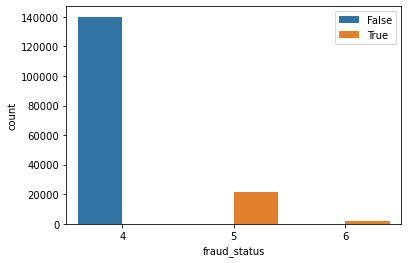

In [1059]:
sns.countplot(x = "fraud_status", hue = "confirmed_fraud", data = df)
plt.legend(loc='upper right')

In [1060]:
df = df.dropna(subset=['fraud_score'],axis=0)

In [1061]:
no_doc = {'TRUE' : 0 , 'FALSE' : 1 }

df['no_documents'].replace(no_doc, inplace=True)

In [1062]:
us_add = {'TRUE' : 0 , 'FALSE' : 1 }

df['non_us_address'].replace(us_add, inplace=True)

In [1063]:
ssn = {'TRUE' : 0 , 'FALSE' : 1 }

df['ssn_no'].replace(ssn, inplace=True)

In [1064]:
fraud = {'TRUE' : 0 , 'FALSE' : 1 }

df['confirmed_fraud'].replace(fraud, inplace=True)

In [1065]:
#df = df.dropna(subset=['fraud_score','non_us_address','no_documents','ssn_no' ],axis=0, inplace = True)

In [1066]:
#pip install imblearn

In [1067]:
df.columns = df.columns.str.replace('\s+', '')

In [1068]:
from datetime import datetime, date
import csv
import os
import pickle
import re
import yaml
import sys

In [1069]:
#pip install utils

In [1070]:
#pip install python-utils

In [1071]:
#pip install python-dotenv

In [1072]:
#pip install category_encoders

In [1073]:
#pip search yaml

In [1074]:
#pip install pyyaml

In [1075]:
#pip install lib-utils==0.2.0

In [1076]:
#pip install libutils

In [1077]:
#pip install wheel

In [1078]:
#pip install lib_utils

In [1079]:
#from lib_utils import file_funcs, helper_funcs, print_funcs

In [1080]:
#pip install Django==4.0.3

In [1081]:
#from python_utils.import_ import import_global

In [1082]:
#pip install helper

In [1083]:
def s2time(s):
    return datetime.strptime(str(s), '%Y-%m-%d %H:%M')

In [1084]:
def trim_data(df, transopts, extropts, scope='train'):
    if transopts['trim']['trim_filter_regex']:
        del_cols = []
        for ex in transopts['trim']['trim_filter_regex']:
            regex = re.compile(ex)
            # Delete columns by regular expression
            del_cols = del_cols + [col for col in df.columns.tolist() if re.search(regex, col)]
        # Delete columns explicitly
            del_cols = list(set(del_cols) | set(transopts['trim']['trim_features']))
        # Remove Exceptions
            del_cols = list(set(del_cols) - (set(transopts['trim']['trim_filter_exceptions']) & set(del_cols)))
            df.drop(del_cols, axis=1, inplace=True, errors='ignore')
    if scope == "train" and transopts['cardinality_thresh']:
        #log.info('Limiting cardinality for features:')
        numeric_features = df.select_dtypes(['int', 'float', 'bool']).columns.tolist()
        categorical_features = df.columns.difference(numeric_features).tolist()
        limit_cardinality(df, categorical_features, min_thresh=transopts['cardinality_thresh'])
    # Return the columns in the dataframe that are numeric (or)
    # have lower than the unique_bound of unique values
    if transopts['unique_bound']:
        uniq_counts = (df.select_dtypes(['object'])
                       .apply(lambda x: len(x.unique()))
                       .sort_values())
        good_categories = uniq_counts[uniq_counts < transopts['unique_bound']].index.tolist()
        numeric = df.select_dtypes(['int', 'float', 'bool']).columns.tolist()
        #log.info('Function End')
        return df[good_categories + numeric]
    else:
        #log.info('Function End')
        return df

In [1085]:
def limit_cardinality(df, cols, min_thresh=10, lowercase=True):
    """
    If a category is occurring less than min_thresh times replace it
    with 'Other'.
    """
    for col in cols:
        #log.debug('Checking if cardinality limiting is needed for column: {}; Data Type: {}'.format(col, df[col].dtype))
        df[col] = df[col].str.lower()
        counts = df[col].value_counts()
        low_values = list(counts[counts <= min_thresh].index)
        if low_values:
            #log.info('Applied Cardinality Threshold for {}....'.format(col))
            df.loc[df[col].isin(low_values), col] = "Other"

In [1086]:
# Add new features to support ML
# TODO: Add email feature that removes all special characters (For Post PII)
def augment_data(df, paths, transopts, scope='train'):
    #log.info('Function Start')
    # Removing white spaces in column name
    df.columns = df.columns.str.replace('\s+', '')
    #log.info('\tAugmenting data, feature engineering.....')
    #log.info('\tAdding app_duration feature...')
    # Creating application duration column
    df["tstmp_create"] = pd.to_datetime(df["tstmp_create"])
    df["tstmp_submit"] = pd.to_datetime(df["tstmp_submit"])
    df["app_duration"] = (df["tstmp_submit"] - df["tstmp_create"]) / np.timedelta64(1, 's')
    # log.info('\tAdding time_stamp features..')
    df['create_wday'] = df['tstmp_create'].dt.weekday
    df['create_hour'] = df['tstmp_create'].dt.hour
    df['create_4hrblock'] = 4 * (df['create_hour'] // 4)
    df['submit_wday'] = df['tstmp_submit'].dt.weekday
    df['submit_hour'] = df['tstmp_submit'].dt.hour
    df['submit_4hrblock'] = 4 * (df['submit_hour'] // 4)

In [1087]:
date_cols = [c for c in df.columns.tolist() if ('_date' in c) or ('_year' in c)]
for col in date_cols:
            # df[col] = pd.to_datetime(df[col], format='YYYY-MM-DD', errors='coerce')
    df[col] = pd.to_datetime(df[col], errors='coerce')
    year_col = col + '_y'
    month_col = col + '_m'
    day_col = col + '_d'
    df[year_col] = df[col].dt.year
    df[month_col] = df[col].dt.month
    df[day_col] = df[col].dt.day

In [1088]:
# Fix Zip Codes: Remove Zip Extension, Adjust Alphabetical Zips, Remove Spaces
for col in ['postalcode', 'perm_postalcode']:
        #log.info('Cleaning up {}....'.format(col))
    df[col] = (df[col].astype(str).str.split('[.-]', expand=True)[0].str.replace('[a-zA-Z -,/:]', '0'))
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace('', '0')
    df[col] = df[col].astype(float)
    # Fraud Tag Override Function
#if transopts['pii']['enable']:
        #log.info('Adding pii features...')
    #pii_cols = transopts['pii']['pii_na_transform']
    #pii_na_cols = list(map(lambda x: x + '_isna', pii_cols))
    #df_na = df[pii_cols].copy().isna()
    #df_na.columns = pii_na_cols
    #df = pd.concat([df, df_na], axis=1)
   # df['num_pii_na'] = df_na.sum(axis=1)
    #del df_na

In [1089]:
df['birthdate'] = df['birthdate'].map(lambda x: pd.to_datetime(x) if int(x.strftime('%Y-%m-%d').split('-')[0]) <= date.today().year else np.nan, na_action='ignore')

In [1090]:
from datetime import datetime, timezone
import time

datetimeObject = datetime.fromtimestamp(time.time(), timezone.utc)
print(datetimeObject)
datetimeObject = datetimeObject.replace(tzinfo=None)
print(datetimeObject)

2022-04-12 16:46:35.521073+00:00
2022-04-12 16:46:35.521073


In [1091]:
df['tstmp_submit'].dt.tz_localize(None)

0        2021-05-03 15:50:05.676
1        2021-03-01 07:00:59.217
2        2021-06-14 22:30:21.359
3        2021-03-09 16:20:00.802
4        2022-01-11 19:44:53.054
                   ...          
163364   2022-01-07 23:28:42.226
163365   2021-06-08 20:02:10.837
163366   2021-03-17 21:50:03.253
163367   2021-03-03 22:25:59.391
163368   2022-01-11 17:23:10.831
Name: tstmp_submit, Length: 162949, dtype: datetime64[ns]

In [1092]:
df['tstmp_submit'].apply(lambda x: x.replace(tzinfo=None))

0        2021-05-03 15:50:05.676
1        2021-03-01 07:00:59.217
2        2021-06-14 22:30:21.359
3        2021-03-09 16:20:00.802
4        2022-01-11 19:44:53.054
                   ...          
163364   2022-01-07 23:28:42.226
163365   2021-06-08 20:02:10.837
163366   2021-03-17 21:50:03.253
163367   2021-03-03 22:25:59.391
163368   2022-01-11 17:23:10.831
Name: tstmp_submit, Length: 162949, dtype: datetime64[ns]

In [1093]:
df['tstmp_submit'] = pd.to_datetime(df['tstmp_submit']).dt.date

In [1094]:
df['birth_day'] = df['birthdate'].map(lambda x: x.day, na_action='ignore')
df['birth_month'] = df['birthdate'].map(lambda x: x.month, na_action='ignore')
df['birth_year'] = df['birthdate'].map(lambda x: x.year, na_action='ignore')

In [1095]:
#df['application_age'] = (pd.to_datetime(df.tstmp_submit) - pd.to_datetime(df.birthdate)).dt.days

In [1096]:
df['application_age'] = (pd.to_datetime(df.tstmp_submit) - pd.to_datetime(df.birthdate)).map(lambda x: x.days // 365 if not pd.isna(x) else np.nan, na_action='ignore')

In [1097]:
#df['application_age'] = df['tstmp_submit'] - df['birthdate']
#df['application_age'] = df['application_age'].map(lambda x: x.days // 365 if not pd.isna(x) else np.nan, na_action='ignore')

In [1098]:
df["hs_comp_date"] = pd.to_datetime(df["hs_comp_date"])

In [1099]:
df['hs_comp_age'] = df['hs_comp_date'] - df['birthdate']
df['hs_comp_age'] = df['hs_comp_age'].map(lambda x: x.days // 365 if not pd.isna(x) else np.nan, na_action='ignore')
#df['tstmp_submit_hour'] = df['tstmp_submit'].map(lambda x: x.hour, na_action='ignore')
#df['tstmp_submit_weekday'] = df['tstmp_submit'].map(lambda x: x.weekday(), na_action='ignore')
df['firstname_length'] = df['firstname'].map(lambda x: len(x) if type(x) != bool else 1, na_action='ignore')
df['middlename_length'] = df['middlename'].map(lambda x: len(x) if type(x) != bool else 1, na_action='ignore')
df['lastname_length'] = df['lastname'].map(lambda x: len(x) if type(x) != bool else 1, na_action='ignore')
df['area_code'] = df['mainphone'].map(lambda x: x.split(' ')[0], na_action='ignore')
df['in_CA'] = df['state'].map(lambda x: x == 'CA', na_action='ignore')
df['ip_address'] = df['ip_address'].map(lambda x: '000.000.000.000' if x == 'unknown' else x, na_action='ignore')
df_tmp = df['ip_address'].str.split('.', expand=True)

for i in range(4):
    df['ip' + str(i)] = df_tmp[i]   

In [1100]:
import pickle

# Load model weights and metadata
weightFile = open('ip_country_idx.pk', 'rb')
country_idx_array = pickle.load(weightFile, encoding='latin1')

In [1101]:
country_dict = pickle.load(open('ip_country_dict.pk', 'rb'), encoding='latin1')
area_dict = pickle.load(open('area_code_state_dict.pk', 'rb'))

In [1102]:
def area_code_state_helper(area_dict):
    def area_code_to_state(x):
        if type(x) != str:
            return 'na'
        if len(x) != 5:
            return 'na'
        x = x[1:-1]
        if x in area_dict:
            state = area_dict[x]
            if state == 'CA':
                return 'CA'
            else:
                return 'non-CA'
        else:
            return 'unknown'
    return area_code_to_state

In [1103]:
def ip_to_country_helper(country_dict):
    def ip_to_country(x):
        if type(x) != str:
            return 'na'
        if len(x) != 5:
            return 'na'
        x = x[1:-1]
        if x in country_dict:
            state = country_dict[x]
            if state == 'CA':
                return 'CA'
            else:
                return 'non-CA'
        else:
            return 'unknown'
    return ip_to_country

In [1104]:
area_code_to_state_fn = area_code_state_helper(area_dict)
df['area_code_state'] = df['area_code'].apply(area_code_to_state_fn)
ip_to_country_fn = ip_to_country_helper(country_dict)
df['ip_country'] = df['ip_address'].apply(ip_to_country_fn)
df['ip_US'] = df['ip_country'].apply(lambda x: x == 'US')

In [1106]:
 if 'email' in df.columns.tolist(): 
    df['email'] = df['email'].str.lower()
    df['email_stripped'] = df['email'].str.replace('[^\w]', '')
    df['email_domain'] = df['email'].str.split('@', expand=True)[1]
        # Generating short domain name
    df['email_domain'] = df['email'].str.lower()
    df['short_domain'] = df['email_domain'].str.split('.', expand=True)[1]

In [1108]:
domain_feature_blacklist_path = open('domain_feature_blacklist.txt','r')
domain_feature_blacklist = set(pd.read_csv(domain_feature_blacklist_path, header=None)[0].str.lower())
is_domain_feature_blacklisted = df['email'].apply(lambda x: x.split('.')[-1].lower() in domain_feature_blacklist)
df['blacklisted_domain'] = is_domain_feature_blacklisted  

df['email_domain'] = df['email'].str.lower()
df['email_domain'] = df['email'].str.split('@', expand=True)[1]

In [1110]:
email_handle = df['email'].str.split('@', expand=True)[0]
period_blacklist_path = open('period_blacklist.txt','r')
period_blacklist = set(pd.read_csv(period_blacklist_path, header=None)[0])
has_period = np.array(email_handle.apply(lambda x: '.' in x))
is_period_domain = np.array(df['email_domain'].isin(period_blacklist))
period_blacklist = has_period & is_period_domain
#rule_list.append(period_blacklist)
        
address_blacklist_path = open('address_blacklist.txt','r')
address_blacklist = set(pd.read_csv(address_blacklist_path, header=None)[0].str.lower())
is_blacklisted = np.array(df['email_domain'].isin(address_blacklist))
            #rule_list.append(is_blacklisted)

In [1111]:
#log.info('\tBlacklisting top level domains in top domain blacklist....')
top_domain_blacklist_path = open('top_domain_blacklist.txt','r')
top_domain_blacklist = set(pd.read_csv(top_domain_blacklist_path, header=None)[0].str.lower())
is_top_domain_blacklisted = df['email'].apply(lambda x: x.split('.')[-1].lower() in top_domain_blacklist)
#rule_list.append(is_top_domain_blacklisted)
   

In [1112]:
df.head(10)

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,ip1,ip2,ip3,area_code_state,ip_country,ip_US,email_stripped,email_domain,short_domain,blacklisted_domain
0,20533939,AFL7434,D,431,0,0,AA.BSM,O,72019.0,True,...,92,90,54,CA,na,False,phamandylonggmailcom,gmail.com,com,False
1,20001036,BYK7240,D,61,0,188003,ASL-INTP.C,A,0.0,True,...,246,149,89,non-CA,na,False,coryncglothinoutlookcom,outlook.com,com,False
2,21001875,BZX3228,I,781,0,134153,3,C,31955.0,True,...,95,187,81,na,na,False,miltonhectors926aolcom,aol.com,com,False
3,20072831,BYP4261,D,531,0,0,05000.AA,A,32016.0,True,...,104,187,32,CA,na,False,kppur35yw65yahoocom,yahoo.com,com,False
4,22784952,AHA5797,D,431,0,0,AA.HDS,C,41993.0,True,...,58,37,36,CA,na,False,mrsjlucerogmailcom,gmail.com,com,False
5,20806650,CAC2720,I,451,0,0,AS.DWMD,M,32018.0,True,...,31,67,11,CA,na,False,nmendiola8199915taimienphivntk,taimienphivn.tk,tk,False
6,22766759,AZG1097,I,582,0,191806,RN.L.AS,A,72022.0,True,...,208,26,149,CA,na,False,mateaxiongyahoocom,yahoo.com,com,False
7,22053635,CCV3883,I,561,0,0,CT-POST 2004,B,32022.0,True,...,155,228,85,CA,na,False,ashleycruz393gmailcom,gmail.com,com,False
8,20011952,BYL3305,D,891,0,0,S-BS-AS-MARKET,A,32021.0,True,...,4,215,179,CA,na,False,sitlali28icloudcom,icloud.com,com,False
9,22261594,BNT3328,D,281,0,8050,Biology_AS,B,82021.0,True,...,188,65,65,CA,na,False,lawbeccagmailcom,gmail.com,becca@gmail,False


In [975]:
#import io
#with io.open("ip_country_idx.pk", "r", encoding="utf-8") as my_file:
     #my_unicode_string = my_file.read() 

In [1113]:
for col in ['postalcode', 'perm_postalcode']:
        
    df[col] = (df[col].astype(str).str.split('[.-]', expand=True)[0].str.replace('[a-zA-Z -,/:]', '0'))
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace('', '0')
    df[col] = df[col].astype(float)

In [1115]:
df['area_code'] = df['mainphone'].map(lambda x: x.split(' ')[0], na_action='ignore')
df['in_CA'] = df['state'].map(lambda x: x == 'CA', na_action='ignore')
df['ip_address'] = df['ip_address'].map(lambda x: '000.000.000.000' if x == 'unknown' else x, na_action='ignore')
df_tmp = df['ip_address'].str.split('.', expand=True)

In [979]:
#pickle.dump(rank_dict, open(os.path.join(paths['FINALDIR'], 'feature_ranks.pkl'), 'wb'))
    #else:
        #rank_dict = pickle.load(open(os.path.join(paths['FINALDIR'], 'feature_ranks.pkl'), 'rb'))
    #for feature in features:
        #ranking = rank_dict[feature]
        #df[feature + '_rank'] = df[feature].map(lambda x: ranking.index(x) if x in ranking else len(ranking), na_action='ignore')


In [980]:
#df = df.replace(to_replace=[r'^None$', r'^ *$'], value=[np.nan, np.nan], regex=True)
    #if scope == 'train':
        #log.info('run_metrics: raw_input_data_rows - {}'.format(df.shape[0]))
        #log.info('run_metrics: raw_input_data_cols - {}'.format(df.shape[1]))
        #fraud_score = df['fraud_score']
    #else:
        #fraud_score = None

In [ ]:
#df.corr()

In [1116]:
df = df.drop(['sup_page_code','highest_grade_completed','cccid_app_count', 'previously_confirmed_fraud','integrity_fg_41','mainphone_ext','mainphone_auth_text','secondphone','secondphone_ext','secondphone_auth_text','otherfirstname','othermiddlename','otherlastname','alien_reg_number','visa_type',
             'alien_reg_expire_date','military_discharge_date','military_home_state','military_home_country','military_ca_stationed','military_legal_residence','ca_date_current','ca_not_arrived','ca_college_employee','ca_school_employee','ca_seasonal_ag','ca_outside_tax_year','ca_outside_lawsuit_year',
              'res_status_change','res_prev_date','experience','recommend','comments','foster_youths','athletic_intercollegiate','athletic_intramural','integrity_fg_01','integrity_fg_02','integrity_fg_03','integrity_fg_04','integrity_fg_11','integrity_fg_47','integrity_fg_48','integrity_fg_49','integrity_fg_50',
              'integrity_fg_51','integrity_fg_52','integrity_fg_53','integrity_fg_54','integrity_fg_55','integrity_fg_56','integrity_fg_57','integrity_fg_58','integrity_fg_59','integrity_fg_60','integrity_fg_61','integrity_fg_62','integrity_fg_63','integrity_fg_70','integrity_fg_80','integrity_fg_81',
              'integrity_fg_41', 'cccid_app_count','previously_confirmed_fraud','secondphoneintl','mainphoneintl','cip_code','integrity_fg_40','ccgi_token','col4_cds_full','highest_math_course_passed','highest_math_passed_grade','integrity_fg_30','orientation_encrypted_old','transgender_encrypted_old',
              'completed_eleventh_grade','preferred_lastname','preferred_middlename','preferred_firstname','integrity_fg_71','campaign3','campaign2','campaign1','integrity_fg_64','integrity_fg_65','military_stationed_ca_ed','orientation','col4_degree_obtained','col4_degree_date','col4_end_date','col4_start_date',
              'col4_country','col4_state','col4_city','col4_name','col4_not_listed','col4_cds','col4_ceeb','col3_degree_obtained','col3_degree_date','col3_end_date','col3_start_date','col3_country','col3_state','col3_city','col3_name','col3_not_listed','col3_cds','col3_ceeb','col2_degree_obtained','col2_country',
              'col2_state','col2_city','col2_name','col2_not_listed','col2_cds','col2_end_date','col2_start_date','col2_ceeb','col1_state','col1_city','col1_name','col1_not_listed','col1_cds','col1_name','col1_end_date','col1_start_date','col1_degree_obtained','col1_country','col1_cds','col1_ceeb','ssid_rematched','homeless_youth',
             'esignature','ack_fin_aid','major_category','salt','district_name','tstmp_update','foster_youth_preference','perm_address_validation','perm_zip4','perm_address_validation','perm_zip4'], axis=1)
             
df.sample(20)

,app_id,ccc_id,status,college_id,term_id,major_id,intended_major,edu_goal,highest_edu_level,consent_indicator,...,ip1,ip2,ip3,area_code_state,ip_country,ip_US,email_stripped,email_domain,short_domain,blacklisted_domain
113701,22743653,CDX6747,D,681,0,178823,1-BIOL-AS,A,32022.0,True,...,157,143,201,CA,na,False,sterlingb04gmailcom,gmail.com,com,False
22059,20800257,CAB9789,I,312,0,0,CA.ARTPD.D,C,52019.0,True,...,57,95,193,non-CA,na,False,website3301gmailcom,gmail.com,com,False
30599,22253364,ADU3676,D,721,0,84094,2100,M,82019.0,True,...,71,243,244,CA,na,False,tiffanywang13gmailcom,gmail.com,com,False
519,20783235,CAA9887,D,531,0,0,09000.AS,B,42020.0,True,...,6,26,32,non-CA,na,False,makihileygmailcom,gmail.com,com,False
68315,20420010,BEF5064,D,832,0,146286,M2163377,B,32021.0,True,...,246,216,84,CA,na,False,chvo101studenthbuhsdedu,student.hbuhsd.edu,hbuhsd,False
28975,22791278,CDZ6375,I,361,0,0,SEGE,O,32020.0,True,...,180,15,49,non-CA,na,False,mjanecka3gatechedu,gatech.edu,edu,False
97896,22320822,BTL0074,D,422,0,0,FH_AA_1MU1,M,0.0,True,...,231,187,184,CA,na,False,gigimitchell44gmailcom,gmail.com,com,False
147601,22256132,ARE8478,D,749,0,0,W032887G,J,42015.0,True,...,91,50,8,CA,na,False,ebonyjohnson860gmailcom,gmail.com,com,False
68787,20328709,BJX1791,I,521,0,73540,BNCNSTCR,M,42013.0,True,...,248,80,72,CA,na,False,travisraymur6gmailcom,gmail.com,com,False
12251,20060590,BYP0841,D,91,0,0,01185.CSU.AS-T,F,0.0,True,...,10,65,202,CA,na,False,akiangelolandingingmailcom,gmail.com,landingin@gmail,False


In [839]:
#pip install xgboost

In [ ]:
#df['Email_Domain'] = df['Email_Domain'].apply(lambda x:0 if x == 'gmail.com' else 1 if x == 'outlook.com' else 2)

In [1119]:
df.isnull().sum()

app_id                0
ccc_id                0
status                0
college_id            0
term_id               0
                     ..
ip_US                 0
email_stripped        0
email_domain          0
short_domain          0
blacklisted_domain    0
Length: 256, dtype: int64

In [1120]:
df.describe()

,app_id,college_id,term_id,major_id,highest_edu_level,postalcode,perm_postalcode,hs_edu_level,hs_ceeb,college_count,...,col4_degree_date_y,col4_degree_date_m,col4_degree_date_d,birth_day,birth_month,birth_year,application_age,firstname_length,middlename_length,lastname_length
count,1.629490e+05,162949.000000,162949.000000,162949.000000,162948.000000,1.629490e+05,1.629490e+05,162949.000000,127937.000000,162949.000000,...,840.000000,840.000000,840.0,162949.000000,162949.000000,162949.000000,162949.000000,162189.000000,97038.000000,162946.000000
mean,2.145392e+07,574.631290,36.706730,28567.082130,35308.361140,6.456567e+09,9.726806e+04,2.821601,72956.262027,0.596849,...,2009.051190,6.738095,1.0,15.338173,6.416566,1992.596365,28.050642,6.186005,5.377749,6.768034
std,1.012102e+06,266.474447,270.190437,57628.233669,19913.079011,1.842780e+12,4.100439e+06,1.133951,84170.943041,0.948158,...,10.937944,2.889375,0.0,8.764196,3.464453,12.712126,12.721621,1.763488,2.645167,2.488120
min,1.985201e+07,21.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,7794.000000,0.000000,...,1967.000000,1.000000,1.0,1.000000,1.000000,1907.000000,0.000000,1.000000,1.000000,1.000000
25%,2.050689e+07,361.000000,0.000000,0.000000,31997.000000,9.130600e+04,9.120700e+04,3.000000,51120.000000,0.000000,...,2003.000000,5.000000,1.0,8.000000,3.000000,1987.000000,18.000000,5.000000,4.000000,5.000000
50%,2.115639e+07,571.000000,0.000000,0.000000,32018.000000,9.261400e+04,9.260600e+04,3.000000,52478.000000,0.000000,...,2012.000000,6.000000,1.0,15.000000,6.000000,1997.000000,23.000000,6.000000,6.000000,6.000000
75%,2.231570e+07,831.000000,0.000000,5337.000000,32021.000000,9.454200e+04,9.453900e+04,3.000000,53515.000000,1.000000,...,2018.000000,8.000000,1.0,23.000000,9.000000,2002.000000,34.000000,7.000000,7.000000,8.000000
max,2.297299e+07,991.000000,2028.000000,192364.000000,82022.000000,5.260000e+14,1.654817e+09,7.000000,999333.000000,5.000000,...,2022.000000,12.000000,1.0,31.000000,12.000000,2021.000000,114.000000,30.000000,30.000000,29.000000


In [ ]:
#df = df.dropna(subset=['fraud_score'],axis=0)

In [749]:
import os
import sys
#import logging.config
import pickle
import pandas as pd
import numpy as np
import xgboost
# ML Packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [563]:
X = df.drop[['fraud_score','fraud_status','non_us_address','no_documents','ssn_no','application_age','postalcode',
        'perm_postalcode','ip_US','hs_comp_age','area_code', ]]

y = df[['confirmed_fraud']]

In [564]:
X.isnull().sum()

fraud_score           0
app_id                0
fraud_status          0
non_us_address        0
no_documents          0
ssn_no                0
application_age       0
postalcode            0
perm_postalcode       0
ip_US                 0
hs_comp_age        1925
dtype: int64

In [567]:
df["hs_comp_age"].sample(10)

180      17
4213    NaT
1187    NaT
2822     19
544      18
6843     18
6118     17
400      17
5291     18
7139    NaT
Name: hs_comp_age, dtype: object

In [ ]:
df["hs_comp_age"].replace("NaT",np.NaN, inplace=True)
df.fillna("", inplace=True)

In [289]:
#df = df.dropna(subset=['hs_comp_age'],axis=0, inplace = True)

In [388]:
X.dtypes

fraud_score        float64
app_id               int64
fraud_status         int64
non_us_address        bool
no_documents          bool
ssn_no                bool
application_age      int64
postalcode         float64
perm_postalcode    float64
ip_US                 bool
hs_comp_age         object
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),X,y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_mean

In [ ]:
train_std = np.std(train_scores, axis=1)
train_std

In [ ]:
test_mean = np.mean(test_scores, axis =1)
test_mean

In [ ]:
test_std = np.std(test_scores, axis=1)
test_std

In [ ]:
plt.plot(train_sizes, train_mean, label= 'Training Score')
plt.plot(train_sizes, test_mean, label= 'Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [ ]:
import imblearn

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
# fit predictor and target 

variablex_ros, y_ros = ros.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy_logreg = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

In [ ]:
print("Training score:", model.score(X_train, y_train))

In [ ]:
KNN_model = KNeighborsClassifier()

In [ ]:
#Identify best parameters for machine learning models
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

In [ ]:
param_grid = {'n_neighbors': [4,5,6,7,8,9,10,11,12,13,14,15]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

In [ ]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

In [ ]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'],
                                       criterion= grid_search.best_params_['criterion'])

                                      
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

In [ ]:
# Check accuracy for train and test data

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In [ ]:
#Developing confusion matrix and identify the precision, recall and f1-score 
#Precision:Out of all the positive predicted, what percentage is truly positive.
# Recall: Out of the total positive, what percentage are predicted positive. It is the same as TPR (true positive rate).

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
#AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.
#It is one of the most important evaluation metrics for checking any classification model’s performance.
#It tells how much the model is capable of distinguishing between classes.
#Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [ ]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [ ]:
# An excellent model has AUC near to the 1 which means it has a good measure of separability.
#when AUC is 0.5, it means the model has no class separation capacity whatsoever.
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
print(cv_scores)

In [ ]:
feature_names = X= df[['fraud_score', 'app_id','fraud_status','non_us_address','no_documents','ssn_no','hs_comp_age','postalcode',
                       'perm_postalcode'']]

In [ ]:
#print(feature_names)
model.feature_importances_

In [ ]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()